<a href="https://colab.research.google.com/github/swapnilpriya/Hotel-Booking-Analysis/blob/main/SWAPNIL_GUNDEWAR_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Understanding and Cleaning the data for analysis**

In [2]:
# import the required packages
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the csv file
file_path="/content/drive/MyDrive/EDA/Hotel Bookings.csv"
df=pd.read_csv(file_path)

In [5]:
# shape of the dataframe
df.shape

(119390, 32)

In [6]:

#first five columns from dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# last five columns from dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
# information about the datatypes in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# overall descriptive summary of the dataframe
df.describe() 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
# calculate the number of missing cells from the dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# four column are found with the missing values. convert it in terms of percentage to fing their values in terms of percentage
df.isnull().sum()/len(df.index)*100


hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [12]:
# from the percentage calculation two colums have higher percentage of missing values: 'agent' and 'company'
# the two colums 'agent' and 'company' will not affect much to our data analysis hence we will remove them
df=df.drop(['agent','company'],axis=1)


In [13]:
# Similary 'children' and 'country' have low percentage of missing values
# hence, we will remove the missing full rows of the missing cells
# deleting the rows with empty cells
df = df.dropna(axis = 0)

In [14]:
# days_in_waiting_list column is not usefull for our data analysis, hence we will remove it. 
df = df.drop(labels='days_in_waiting_list', axis=1) 
# Again checking for the missing values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [15]:
# Now, we don't have any missing values. Once again we will see the final dataframe for the analysis
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

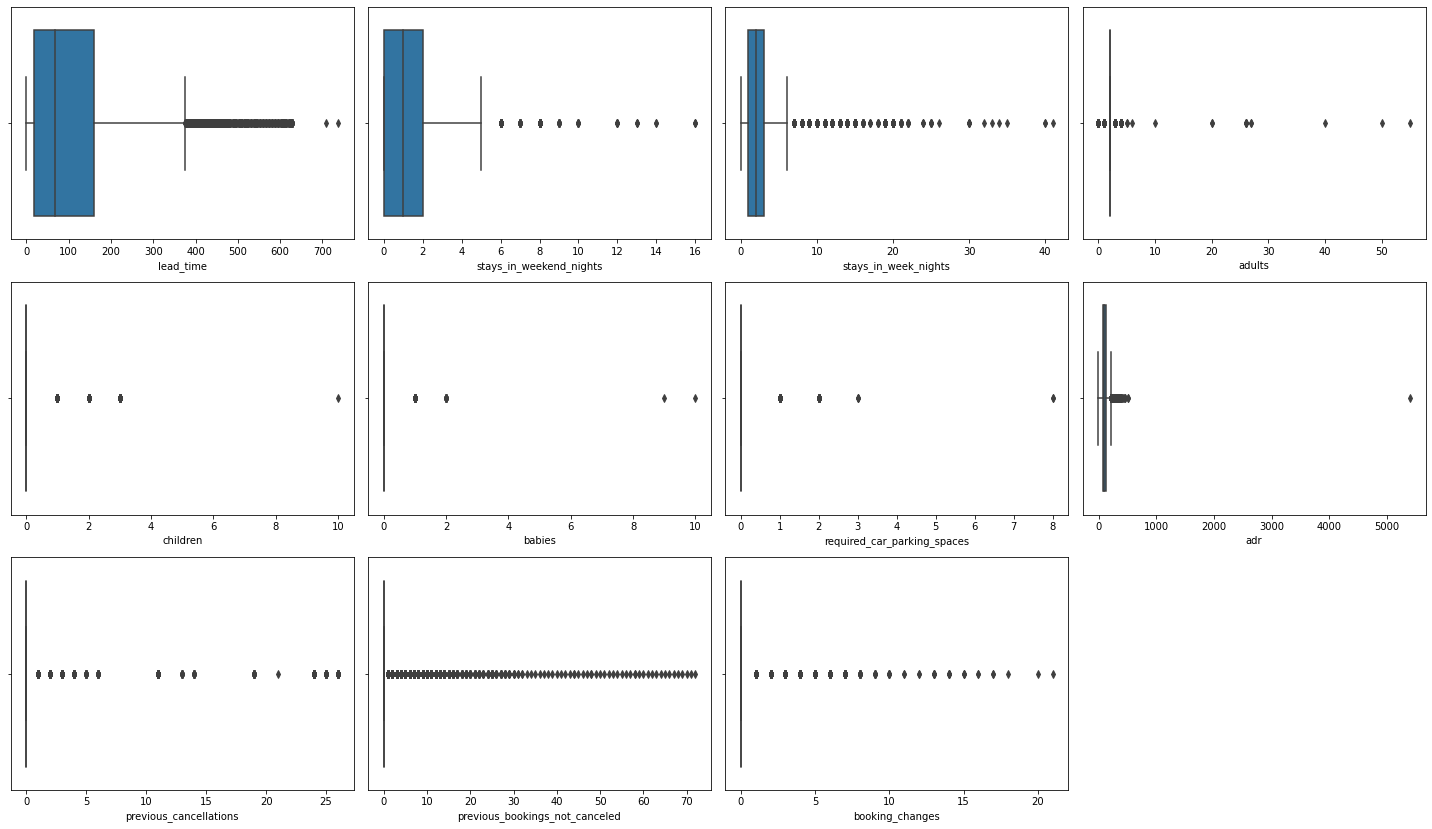

In [16]:
# we can see here some outliers. To see it better we will plot the boxplots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

In [17]:
# Remove the outliers using conditionals to get the updataed values
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

In [ ]:

# after removing the outliers, our data is clean now


# **Exploratory Analysis and Visualization**

In [18]:
# we have two separate columns 'children' and 'babies' in our dataframe
# for simplicity, we will merge them into single colums as 'kids'
# we set the string datatype to corresponding colums
df['kids'] = df.children + df.babies

# Combine total mumbers by adding kids and adults
df['total_members'] = df.kids + df.adults
# convert the datatypes to string
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [19]:
# similary, converting the arrival date to datetime
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# **1) Confirm bookings per month**

In [20]:
import datetime as dt

confirmed_bookings = df[df.is_canceled=='0']

confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: arrival_date_month, dtype: int64

In [ ]:
# The lowest bookings are found to be in the first month i.e., January equal to (4068)
# The highest bookings are found to be in the eighth month i.e., August equal to (8618)

# **2) Cancelled bookings**

In [21]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    74745
1    44153
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


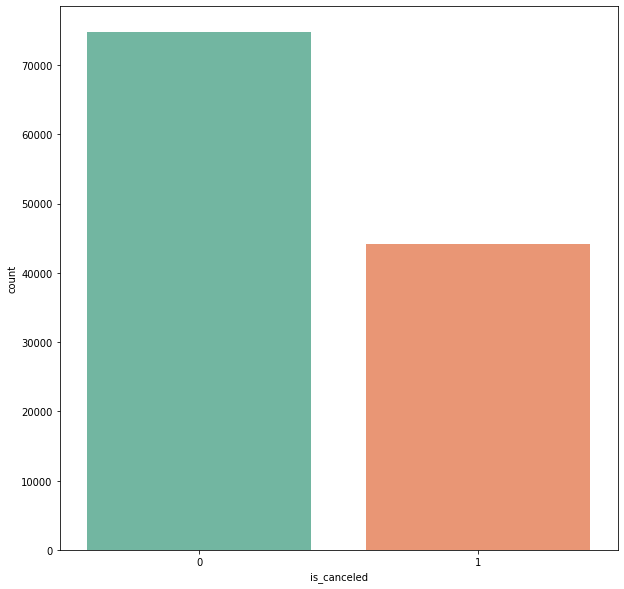

In [22]:
# During the year the calcellation percentage is found to be 37.13%
# Now we plot the results
plt.figure(figsize=(10,10))

#Canceled=1, Not canceled= 0
sns.countplot(df['is_canceled'], palette='Set2')
plt.show()


# **3) Country of origin**

In [23]:
# since the categories are mentioned in ISO 3155–3:2013 format, we will normalise them
df.country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

# **4) Arrival date by months**

In [24]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


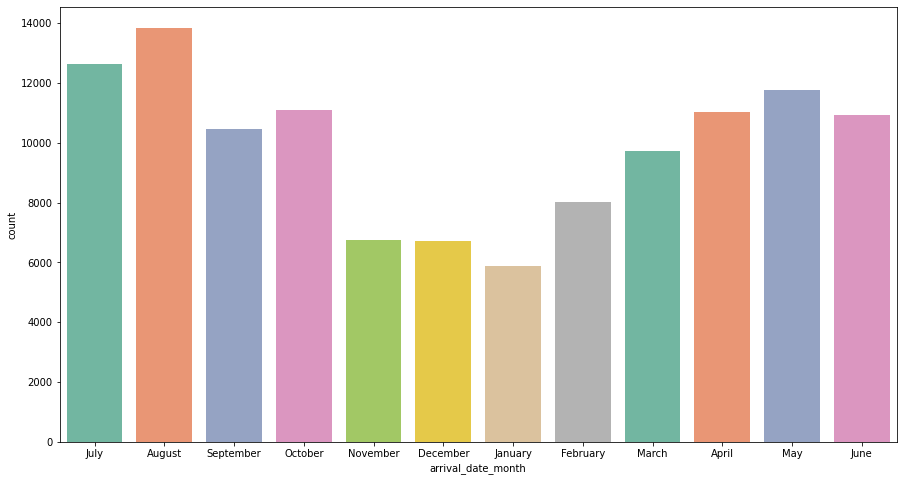

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(df['arrival_date_month'], palette='Set2')
plt.show()

# **5) Market Segment**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


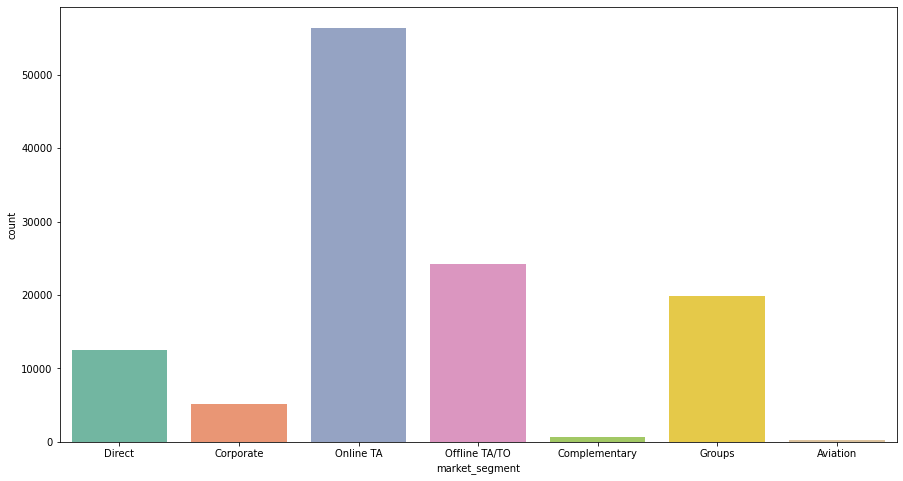

In [26]:
# now we will analyse the market segment designation and plot it
df.market_segment.value_counts(normalize=True)
plt.figure(figsize=(15,8))
sns.countplot(df['market_segment'], palette='Set2')
plt.show()

# **6) Arrival date year**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


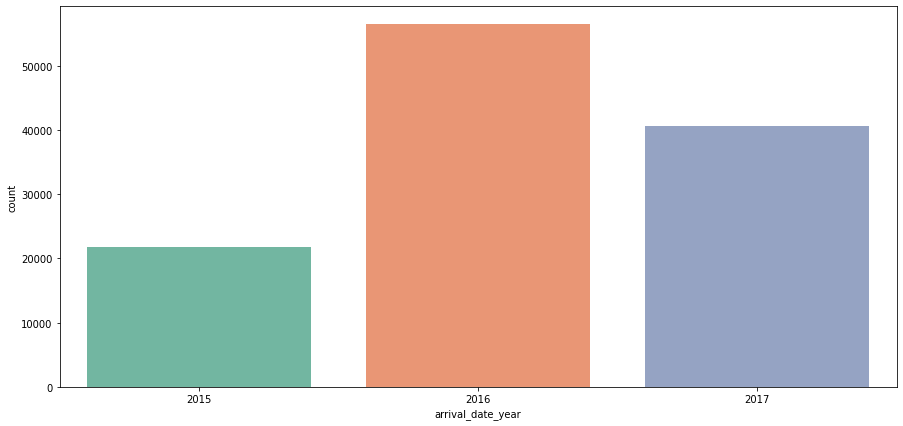

In [27]:
# First we normalise and then plot
df.arrival_date_year.value_counts(normalize=True)
plt.figure(figsize=(15,7))
sns.countplot(df['arrival_date_year'], palette='Set2')
plt.show()

# **7) Type of meal booked**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


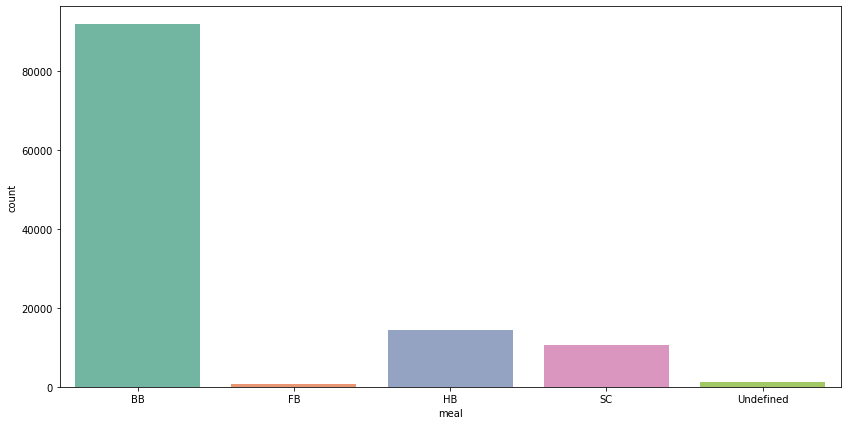

In [28]:
# Categories are presented in standard hospitality meal packages:
# Undefined/SC — no meal package;
# BB — Bed & Breakfast;
# HB — Half board (breakfast and one other meal — usually dinner);
# FB — Full board (breakfast, lunch and dinner)
# Same thing we will repeat for the meal, first we normalise the data and then plot it
df.meal.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df['meal'], palette='Set2')
plt.show()

# **8) Customer Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


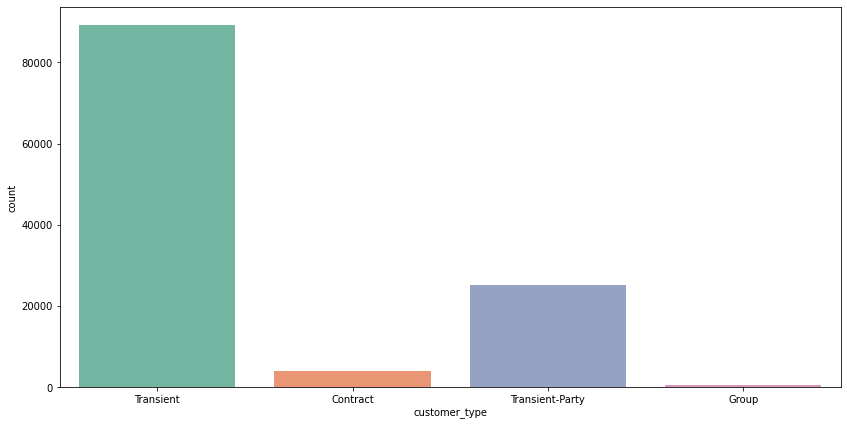

In [29]:
# from the dataframe the categories for the customers are divided into four types
# Contract — when the booking has an allotment or other type of contract associated to it;
# Group — when the booking is associated to a group;
# Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;
# Transient-party — when the booking is transient, but is associated to at least other transient booking
df.customer_type.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='Set2')
plt.show()

# **9) Type of the reserved room**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


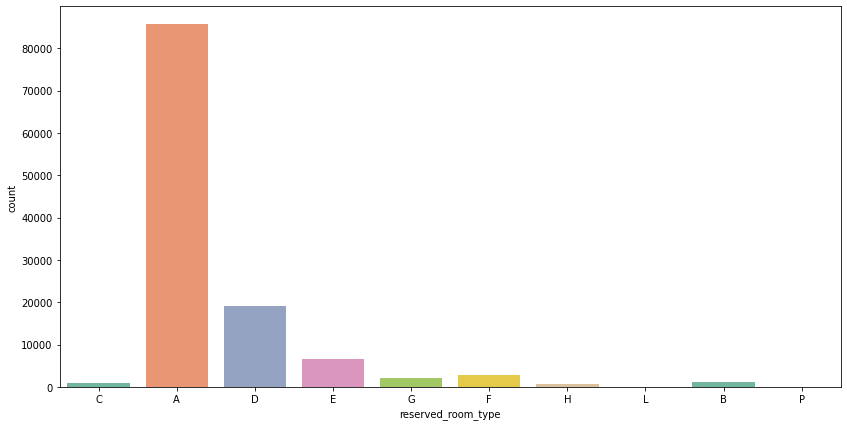

In [30]:
# Code of room type reserved. Code is presented instead of designation for anonymity reasons
# normalising and plotting it
df.reserved_room_type.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette='Set2')
plt.show()

# **10) Assigned Room type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


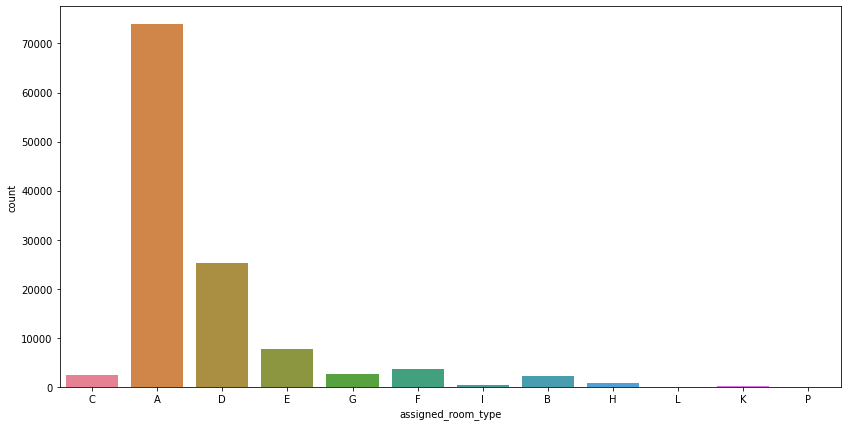

In [31]:
# Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (overbooking) or by customer request
df.assigned_room_type.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df['assigned_room_type'], palette='husl')
plt.show()